In [1]:
# Import libaries and dependencies #
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import data & convert to dataframe
batting_data_load = "../Project_01/CHC_batting.csv"
batting_data = pd.read_csv(batting_data_load)
batting_data.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [3]:
# Import data & convert to dataframe
pitching_data_load = "../Project_01/CHC_pitching.csv"
pitching_data = pd.read_csv(pitching_data_load)
pitching_data.head()

,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
1,2,2023,SP,Jameson Taillon,31,8,10,0.444,4.84,30,...,93,4.61,1.276,9.1,1.6,2.4,8.2,3.41,Right,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
3,4,2023,SP,Kyle Hendricks,33,6,8,0.429,3.74,24,...,120,3.81,1.204,9.1,0.9,1.8,6.1,3.44,Right,No
4,5,2023,SP,Marcus Stroman,32,10,9,0.526,3.95,27,...,113,3.58,1.259,7.9,0.6,3.4,7.8,2.29,Right,No


In [ ]:
# merge datasets ?

In [4]:
# Explore data

print("General info about batting:")
print(batting_data.shape)
print(batting_data.columns)
print(batting_data.dtypes)

print("General info about pitching:")
print(pitching_data.shape)
print(pitching_data.columns)
pitching_data.dtypes

General info about batting:
(5241, 31)
Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')
Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_B

Rank                               int64
Year                               int64
Position                          object
Name                              object
Age                                int64
Wins                               int64
Losses                             int64
Winning_Percentage               float64
Earned_Run_Average               float64
Games_Played                       int64
Games_Started                      int64
Games_Finished                     int64
Complete_Games                     int64
Shutouts                           int64
Saves                              int64
Innings_Pitched                  float64
Hits_Allowed                       int64
Runs_Allowed                       int64
Earned_Runs                        int64
Home_Runs_Allowed                  int64
Walks_Allowed                      int64
Intentional_Walks_Allowed          int64
Strikeouts                         int64
Hit_By_Pitch                       int64
Balks           

In [5]:
# Convert object to string
batting_data['Position'] = batting_data['Position'].astype("string")
print(batting_data['Position'].dtype)

string


In [6]:
# Convert object to string
pitching_data['Dominant_Hand'] = pitching_data['Dominant_Hand'].astype("string")
print(pitching_data['Dominant_Hand'].dtype)

string


In [7]:
# Check for missing values, duplicates, etc
print(batting_data.isna().sum())                # shows as 0 here but has nans in bar chart below (for Position column)
print(pitching_data.isna().sum())

Rank                                      0
Year                                      0
Position                                 78
Name                                      0
Age                                       0
Games                                     0
Plate_Appearances                         0
At_Bats                                   0
Runs                                      0
Hits                                      0
Doubles                                   0
Triples                                   0
Home_Runs                                 0
Runs_Batted_In                            0
Stolen_Bases                              0
Caught_Stealing                           0
Base_On_Balls                             0
Strikeouts                                0
Batting_Average                           0
On_Base_Percentage                        0
Slugging_Percentage                       0
On_Base_Plus_Slugging_Percentage          0
On_Base_Plus_Slugging_Percentage

In [8]:

batting_data["Position"].unique()

<StringArray>
[ 'C', '1B', '2B', 'SS', '3B', 'LF', 'CF', 'RF', 'DH', 'CI', 'OF',  'P', 'UT',
 'IF', 'MI', <NA>]
Length: 16, dtype: string

In [9]:
batting_data_position_nans = batting_data.loc[batting_data["Position"] == "nan"]
batting_data_position_nans
#Looking for rows that contain "nan" for Position 
# rename insteadand state as limitation

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter


In [ ]:
batting_data_position_nan_clean = batting_data[batting_data["Position"] .isin(batting_data_position_nans) == False]
batting_data_position_nan_clean

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,7,1876,OF,John Glenn,26,66,288,276,55,84,...,0.685,120,97,0,0,0,0,0,Right,No
5237,8,1876,OF,Paul Hines,21,64,306,305,62,101,...,0.773,146,134,0,0,0,0,0,Right,No
5238,9,1876,OF,Oscar Bielaski,29,32,141,139,24,29,...,0.450,44,32,0,0,0,0,0,Right,No
5239,10,1876,OF,Fred Andrus,25,8,36,36,6,11,...,0.694,121,14,0,0,0,0,0,Right,No


In [10]:
batting_data_position_nan_clean["Position"].unique()
# since it still contains "nan", there is a problem in the code to drop these. but when it's fixed, we can apply it to the bar charts below.

NameError: name 'batting_data_position_nan_clean' is not defined

In [72]:
# duplicates: Since the players are listed by rank, each player should only appear once per year. 
# It appears there aren't any duplicates, but I'm not sure did this correctly.

len(batting_data["Name"].value_counts())

2219

In [11]:
# batting_data["Name"].value_counts()

Name
Cap Anson          22
Phil Cavarretta    20
Ernie Banks        19
Gabby Hartnett     19
Billy Williams     16
                   ..
Manny Seoane        1
Woodie Fryman       1
Rudy Meoli          1
Davey Johnson       1
Oscar Bielaski      1
Name: count, Length: 2219, dtype: int64

In [13]:
duplicate_players = batting_data.loc[batting_data.duplicated(['Name','Year']), "Name"].unique()
print(duplicate_players)

[]


In [75]:
# batting_data_clean = batting_data[batting_data["Name"] .isin(duplicate_players) == False]
# batting_data_clean.head()

,Rank,Year,Position,Name,Age,Games,Plate_Appearances,At_Bats,Runs,Hits,...,On_Base_Plus_Slugging_Percentage,On_Base_Plus_Slugging_Percentage_Plus,Total_Bases,Double_Plays_Grounded_Into,Times_Hit_By_Pitch,Sacrifice_Hits,Sacrifice_Flies,Intentional_Bases_on_Balls,Dominant_Hand,Switch_Hitter
0,1,2023,C,Yan Gomes,35,116,419,382,44,102,...,0.723,93,156,9,9,0,7,1,Right,No
1,2,2023,1B,Trey Mancini,31,79,263,235,31,55,...,0.635,71,79,5,2,0,3,1,Right,No
2,3,2023,2B,Nico Hoerner,26,150,688,619,98,175,...,0.729,97,237,12,14,1,5,0,Right,No
3,4,2023,SS,Dansby Swanson,29,147,638,565,81,138,...,0.744,99,235,9,5,0,2,0,Right,No
4,5,2023,3B,Nick Madrigal,26,92,294,270,34,71,...,0.663,79,95,3,9,5,0,0,Right,No


In [14]:
# len(batting_data["Name"].value_counts())

2219

In [ ]:
# Initial data exploration:
# sum stats

# visualizations for potential relationships (-> regression)

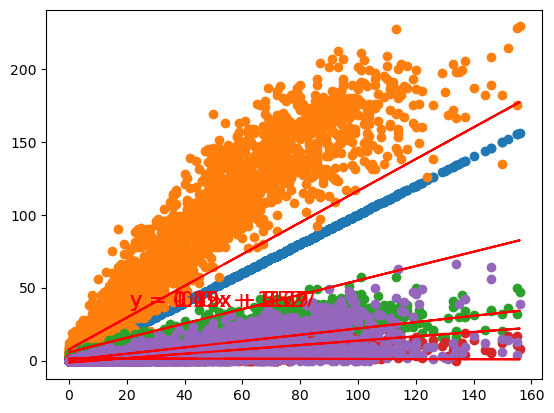

In [29]:
# Define a function to create Linear Regression plots - Not working but could be useful if anyone figured it out!


columns_age_regress = [batting_data["Runs"],batting_data["Hits"],batting_data["Doubles"],batting_data["Triples"],batting_data["Home_Runs"]]

for item in columns_age_regress:

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], item)
    regress_values = batting_data["Runs"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(batting_data["Runs"],item)
    plt.plot(batting_data["Runs"],regress_values,"r-")
    plt.annotate(line_eq,(21,37),fontsize=15,color="red")



The r-value is 0.0056428420095168364.


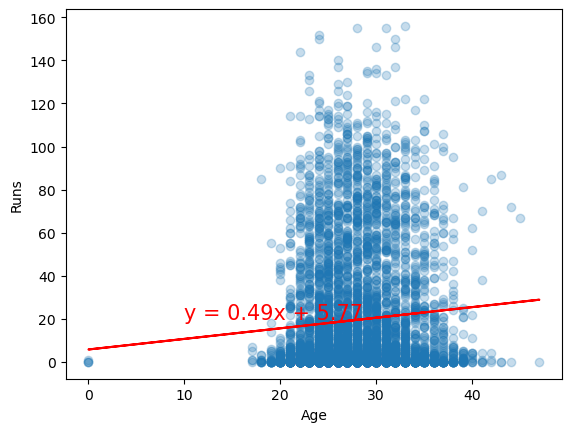

The r-value is 0.008256072644018128.


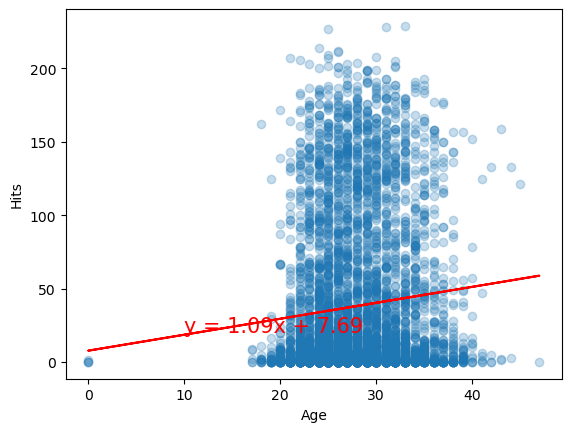

The r-value is 0.009900761218802703.


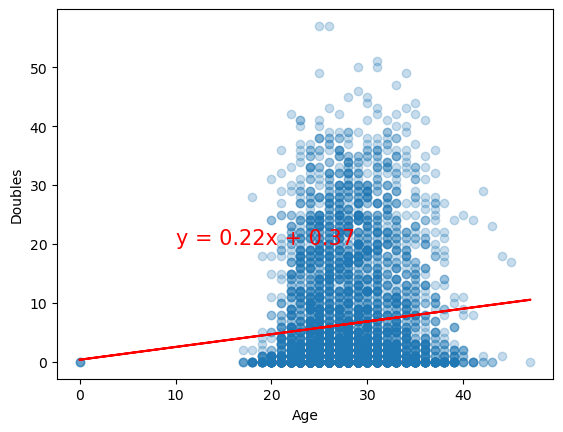

The r-value is 3.507418844650481e-05.


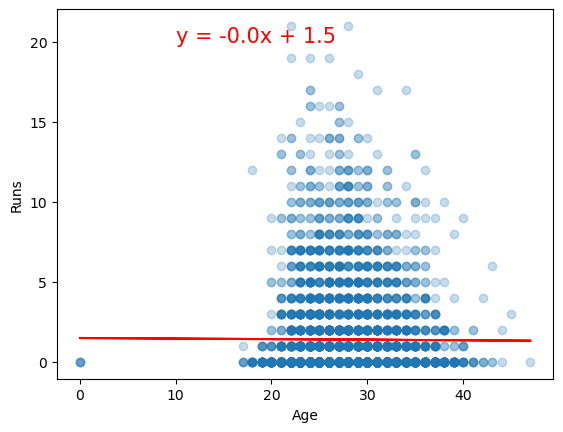

The r-value is 0.010362006106735587.


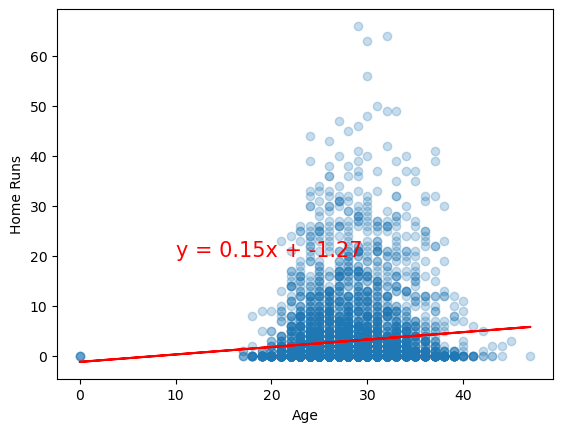

Age does not predict performance.


In [27]:
# Visualizations for Age & Performance
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Runs"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Runs"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Hits"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Hits"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Hits")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Doubles"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Doubles"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Doubles")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Triples"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Triples"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(batting_data["Age"], batting_data["Home_Runs"])
regress_values = batting_data["Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue**2}.")
plt.scatter(batting_data["Age"],batting_data["Home_Runs"], alpha=0.25)
plt.plot(batting_data["Age"],regress_values,"r-")
plt.xlabel("Age")
plt.ylabel("Home Runs")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.show()

print("Age does not predict performance.")

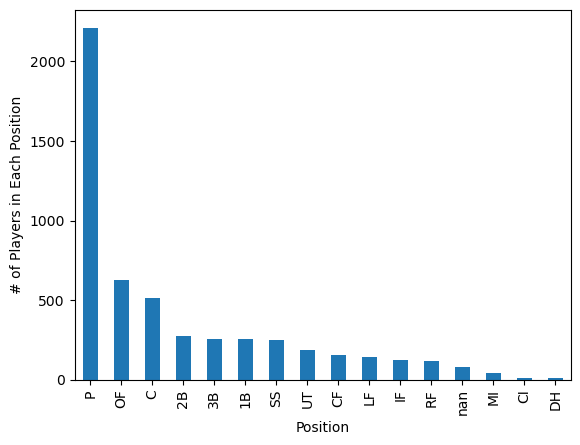

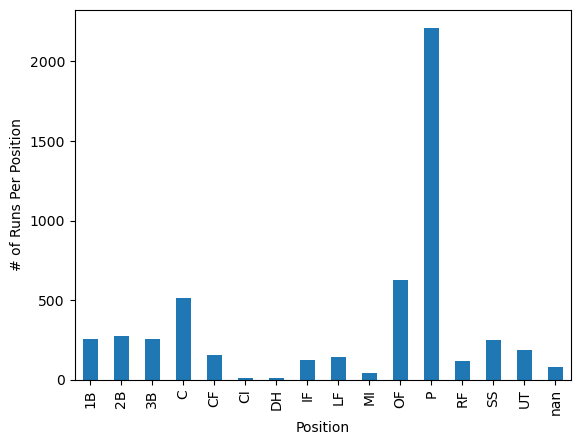

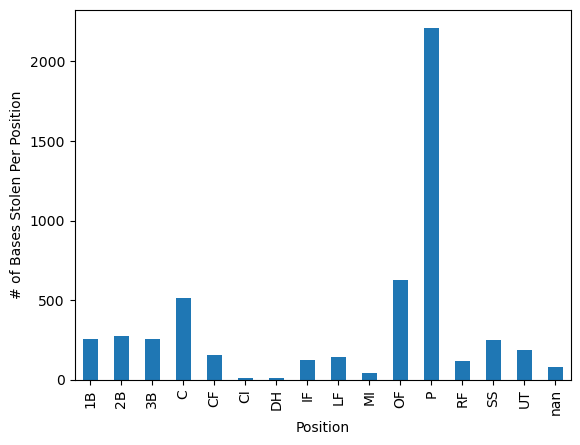

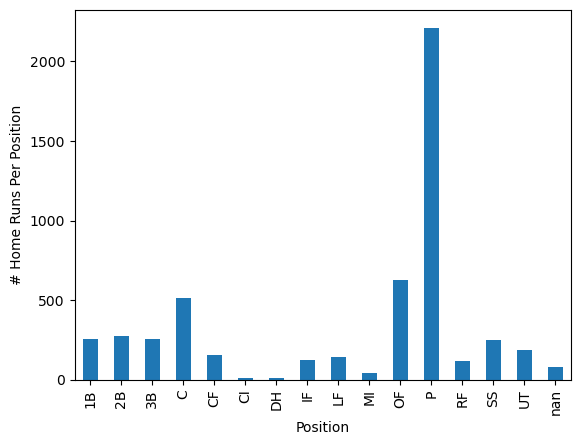

In [36]:
# Player Position and Performance

position_graph = batting_data["Position"].value_counts()
position_graph.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Players in Each Position')
plt.show()

position_runs_graph = batting_data.groupby(["Position"])["Runs_Batted_In"].count()
position_runs_graph.head()
position_runs_graph.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Runs Per Position')
plt.show()

position_basesstolen_graph = batting_data.groupby(["Position"])["Stolen_Bases"].count()
position_basesstolen_graph.head()
position_basesstolen_graph.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# of Bases Stolen Per Position')
plt.show()

position_basesstolen_graph = batting_data.groupby(["Position"])["Home_Runs"].count()
position_basesstolen_graph.head()
position_basesstolen_graph.plot(kind='bar',
                    xlabel='Position',
                    ylabel='# Home Runs Per Position')
plt.show()

In [ ]:
# Does a pitcher's overall performance impact game losses and wins?

In [46]:
# Does a player's dominant hand have an impact on the player's performance?


# All right-handed players:
pitching_data_right = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Right"]
pitching_data_right.head()

# All left-handed players:
pitching_data_left = pitching_data.loc[pitching_data["Dominant_Hand"] ==  "Left"]
pitching_data_left.head()



,Rank,Year,Position,Name,Age,Wins,Losses,Winning_Percentage,Earned_Run_Average,Games_Played,...,Adjusted_Earned_Run_Average,Fielding_Independent_Pitching,Walks_Hits_Per_Inning_Pitched,Hits_Per_Nine_Innings,Home_Runs_Per_Nine_Innings,Walks_Per_Nine_Innings,Strikeouts_Per_Nine_Innings,Strikeout_Walk_Ratio,Dominant_Hand,Switch_Hitter
0,1,2023,SP,Justin Steele,27,16,5,0.762,3.06,30,...,146,3.02,1.171,8.7,0.7,1.9,9.1,4.89,Left,No
2,3,2023,SP,Drew Smyly,34,11,11,0.500,5.00,41,...,90,4.96,1.426,9.3,1.6,3.5,8.9,2.52,Left,No
12,13,2023,NaN,Jordan Wicks,23,4,1,0.800,4.41,7,...,102,4.70,1.269,8.6,1.3,2.9,6.2,2.18,Left,No
17,18,2023,NaN,Brandon Hughes,27,0,3,0.000,7.24,17,...,63,4.65,1.610,9.2,1.3,5.3,11.2,2.13,Left,No
18,19,2023,NaN,Anthony Kay,28,0,0,0.000,6.35,13,...,73,5.37,1.765,9.5,0.8,6.4,6.4,1.00,Left,No


In [55]:
# Look at Strikeouts_Per_Nine_Innings

strikeouts_right_mean = pitching_data_right["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_right_median = pitching_data_right["Strikeouts_Per_Nine_Innings"].median()
strikeouts_right_std = pitching_data_right["Strikeouts_Per_Nine_Innings"].std()

In [60]:
strikeouts_left_mean = pitching_data_left["Strikeouts_Per_Nine_Innings"].mean()
strikeouts_left_median = pitching_data_left["Strikeouts_Per_Nine_Innings"].median()
strikeouts_left_std = pitching_data_left["Strikeouts_Per_Nine_Innings"].std()

In [61]:
strikeouts_byhand_summary_r = {
                    'Average': strikeouts_right_mean,            
                    'Median': strikeouts_right_median,      
                    'Std. Dev.': strikeouts_right_std      
                    }

strikeouts_byhand_summary_rt = pd.DataFrame(strikeouts_byhand_summary_r, index=['Right-handed'])
strikeouts_byhand_summary_rt

,Average,Median,Std. Dev.
Right-handed,5.232828,4.7,2.987241


In [62]:
strikeouts_byhand_summary_l = {
                    'Average': strikeouts_left_mean,            
                    'Median': strikeouts_left_median,      
                    'Std. Dev.': strikeouts_left_std      
                    }

strikeouts_byhand_summary_lt = pd.DataFrame(strikeouts_byhand_summary_l, index=['Left-handed'])
strikeouts_byhand_summary_lt

,Average,Median,Std. Dev.
Left-handed,5.738079,5.3,3.324458


In [69]:
# stikeouts_byhand_summary = pd.concat([strikeouts_byhand_summary_rt,strikeouts_byhand_summary_lt], ignore_index=False)


In [71]:
# strikeouts_byhand_summary

{'Average': 5.232827988338192, 'Median': 4.7, 'Std. Dev.': 2.987240640109758}

<Axes: ylabel='Dominant Hand'>

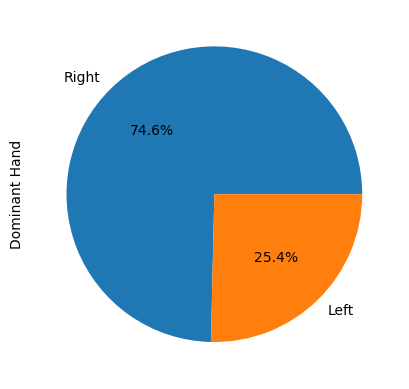

In [47]:
# Pie chart of right vs left-handed
dominant_hand_comparison = pitching_data["Dominant_Hand"].value_counts()
dominant_hand_comparison.plot(
                        kind='pie',
                        ylabel='Dominant Hand',
                        autopct="%1.1f%%")